# Marketing Campaign Analysis

# 1. Introduction
### Marketing campaigns play a critical role in business growth, influencing customer engagement, conversion rates, and overall revenue. This analysis evaluates a marketing campaign dataset to identify the most effective channels, understand customer behavior, and optimize future marketing strategies. By leveraging data-driven insights, businesses can enhance decision-making, improve return on investment (ROI), and maximize campaign performance.

# Key Objectives
* ### Determine the best-performing marketing channels.
* ### Analyze customer demographics and their response to campaigns.
* ### Identify trends and areas for optimization.
* ### Provide actionable recommendations to enhance future marketing efforts.

In [1]:
# Import necessary libraries
import pandas as pd

# Define file path
file_path = r"C:\Users\SONY VIO\Marketing Campaign Dataset.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


(None,
    Campaign_ID              Company Campaign_Type Target_Audience Duration  \
 0            1  Innovate Industries         Email       Men 18-24  30 days   
 1            2       NexGen Systems         Email     Women 35-44  60 days   
 2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
 3            4   DataTech Solutions       Display        All Ages  60 days   
 4            5       NexGen Systems         Email       Men 25-34  15 days   
 
   Channel_Used  Conversion_Rate  Acquisition_Cost   ROI     Location  \
 0   Google Ads             0.04             16174  6.29      Chicago   
 1   Google Ads             0.12             11566  5.61     New York   
 2      YouTube             0.07             10200  7.18  Los Angeles   
 3      YouTube             0.11             12724  5.55        Miami   
 4      YouTube             0.05             16452  6.50  Los Angeles   
 
                   Date  Clicks  Impressions  Engagement_Score  \
 0  2021-01

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Get basic statistics of numerical columns
statistics_summary = df.describe()

missing_values, statistics_summary


(Campaign_ID         0
 Company             0
 Campaign_Type       0
 Target_Audience     0
 Duration            0
 Channel_Used        0
 Conversion_Rate     0
 Acquisition_Cost    0
 ROI                 0
 Location            0
 Date                0
 Clicks              0
 Impressions         0
 Engagement_Score    0
 Customer_Segment    0
 dtype: int64,
          Campaign_ID  Conversion_Rate  Acquisition_Cost            ROI  \
 count  200005.000000    200005.000000     200005.000000  200005.000000   
 mean   100003.000000         0.080069      12504.441794       5.002416   
 std     57736.614632         0.040602       4337.663210       1.734485   
 min         1.000000         0.010000       5000.000000       2.000000   
 25%     50002.000000         0.050000       8740.000000       3.500000   
 50%    100003.000000         0.080000      12497.000000       5.010000   
 75%    150004.000000         0.120000      16264.000000       6.510000   
 max    200005.000000         0.150000  

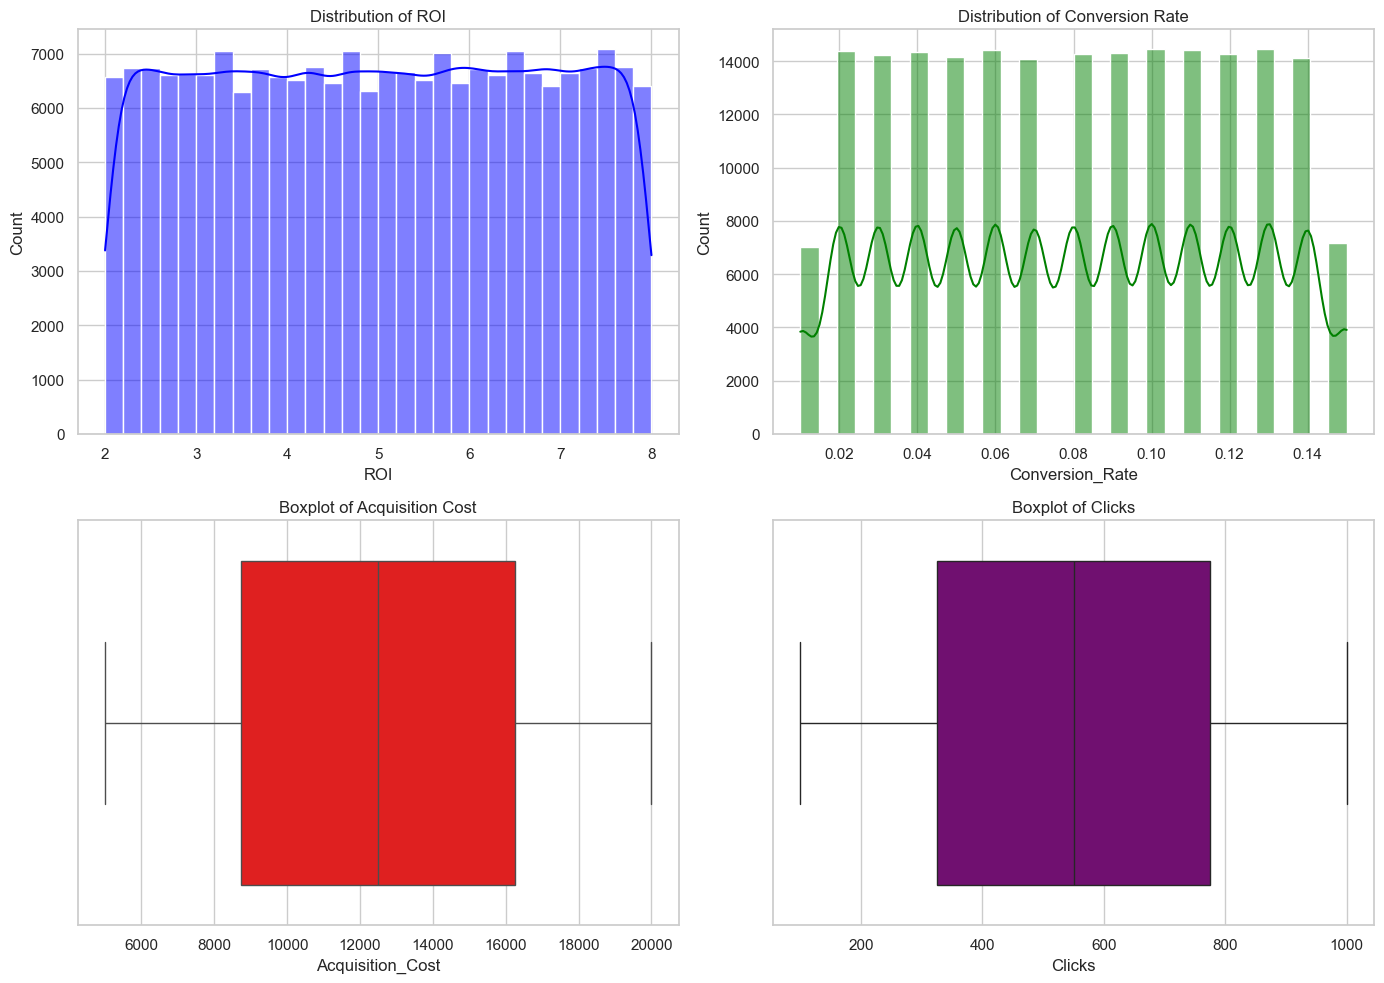

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of ROI
sns.histplot(df['ROI'], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of ROI")

# Distribution of Conversion Rate
sns.histplot(df['Conversion_Rate'], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Conversion Rate")

# Boxplot of Acquisition Cost
sns.boxplot(x=df['Acquisition_Cost'], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Boxplot of Acquisition Cost")

# Boxplot of Clicks
sns.boxplot(x=df['Clicks'], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Boxplot of Clicks")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [8]:
# Save visualizations to Jupyter directory
fig.savefig("Marketing_Campaign_EDA.png")


In [11]:
import os
print(os.getcwd())

C:\Users\SONY VIO


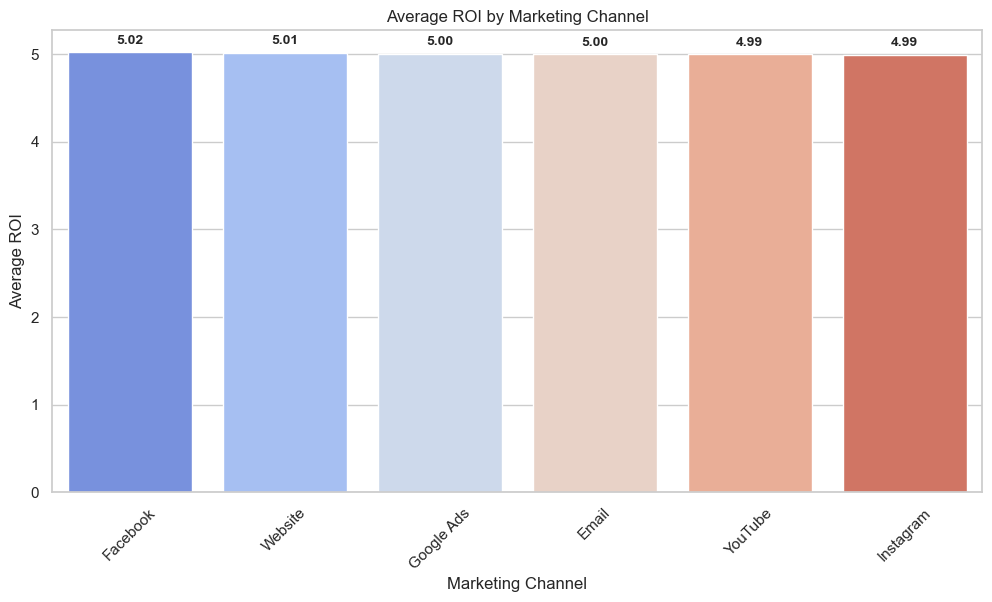

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Campaign performance comparison across different channels
channel_performance = df.groupby("Channel_Used")[["ROI", "Conversion_Rate", "Acquisition_Cost"]].mean().sort_values(by="ROI", ascending=False)

# Plot ROI by Channel
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_performance.index, y=channel_performance["ROI"], hue=channel_performance.index, palette="coolwarm", legend=False)

plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.title("Average ROI by Marketing Channel")
plt.xticks(rotation=45)

# Show values on bars
for index, value in enumerate(channel_performance["ROI"]):
    plt.text(index, value + 0.1, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("ROI_by_Channel.png")

plt.show()



<Axes: xlabel='Channel_Used', ylabel='ROI'>

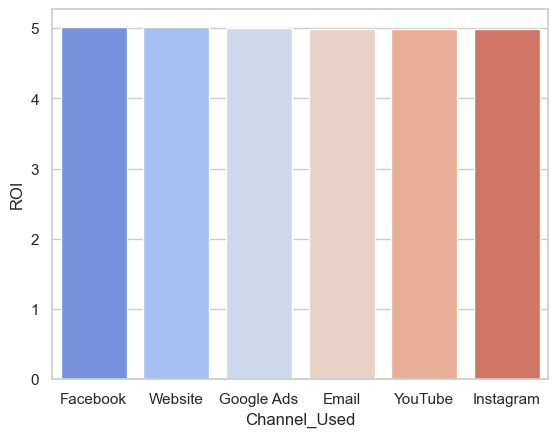

In [14]:
sns.barplot(x=channel_performance.index, 
            y=channel_performance["ROI"], 
            hue=channel_performance.index,  # Assign hue to x variable
            palette="coolwarm", 
            legend=False)  # Disable redundant legend


In [15]:
# Identify top 10 high-performing campaigns based on ROI
top_campaigns = df.nlargest(10, "ROI")[["Campaign_ID", "Company", "Channel_Used", "ROI", "Conversion_Rate", "Clicks"]]

# Identify bottom 10 underperforming campaigns based on ROI
low_campaigns = df.nsmallest(10, "ROI")[["Campaign_ID", "Company", "Channel_Used", "ROI", "Conversion_Rate", "Clicks"]]

top_campaigns, low_campaigns

(       Campaign_ID              Company Channel_Used  ROI  Conversion_Rate  \
 167            168       NexGen Systems      Website  8.0             0.12   
 219            220  Innovate Industries        Email  8.0             0.03   
 3055          3056       NexGen Systems        Email  8.0             0.11   
 3231          3232    Alpha Innovations    Instagram  8.0             0.01   
 5347          5348             TechCorp        Email  8.0             0.06   
 5929          5930  Innovate Industries    Instagram  8.0             0.15   
 8225          8226       NexGen Systems   Google Ads  8.0             0.08   
 8365          8366  Innovate Industries      Website  8.0             0.08   
 9890          9891    Alpha Innovations        Email  8.0             0.09   
 12331        12332             TechCorp      YouTube  8.0             0.01   
 
        Clicks  
 167       568  
 219       924  
 3055      606  
 3231      476  
 5347      420  
 5929      326  
 8225     

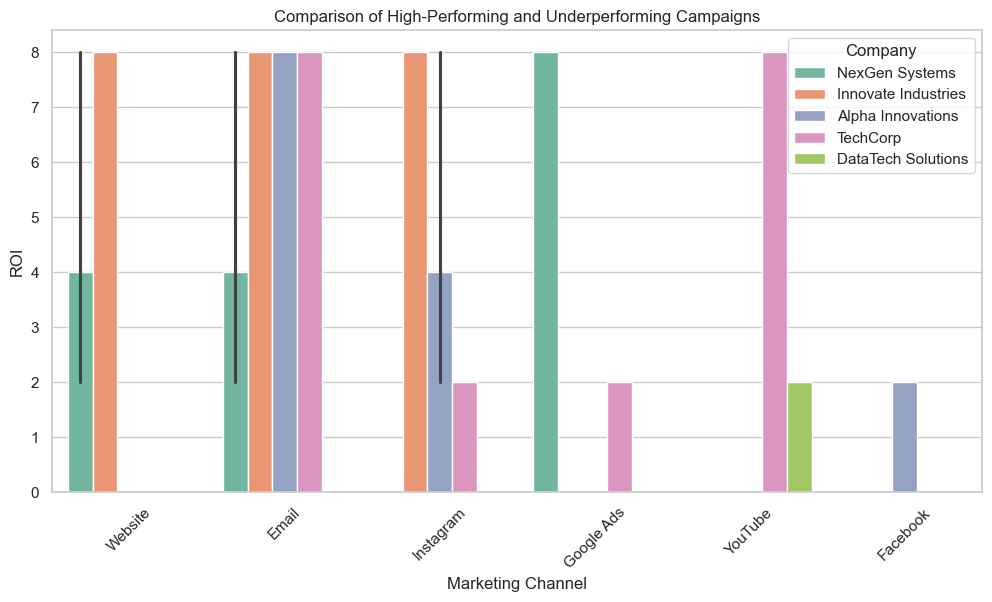

In [16]:
# Barplot comparing top and bottom campaign ROIs
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.concat([top_campaigns, low_campaigns])["Channel_Used"], 
            y=pd.concat([top_campaigns, low_campaigns])["ROI"], 
            hue=pd.concat([top_campaigns, low_campaigns])["Company"], 
            palette="Set2")

plt.xlabel("Marketing Channel")
plt.ylabel("ROI")
plt.title("Comparison of High-Performing and Underperforming Campaigns")
plt.xticks(rotation=45)
plt.legend(title="Company")

# Save the figure
plt.savefig("Campaign_Performance_Comparison.png")

plt.show()


In [17]:
print(channel_performance.head())  # Check if data exists
print(channel_performance.info())  # Check for NaN values

                   ROI  Conversion_Rate  Acquisition_Cost
Channel_Used                                             
Facebook      5.018672         0.079990      12510.768617
Website       5.014114         0.080182      12487.842001
Google Ads    5.003126         0.080181      12528.245036
Email         4.996487         0.080282      12526.387809
YouTube       4.993720         0.079890      12481.570688
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Facebook to Instagram
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ROI               6 non-null      float64
 1   Conversion_Rate   6 non-null      float64
 2   Acquisition_Cost  6 non-null      float64
dtypes: float64(3)
memory usage: 364.0+ bytes
None


In [18]:
channel_performance = channel_performance.dropna(subset=["ROI"])  # Drop missing values

C:\Users\SONY VIO\AppData\Local\Temp\ipykernel_4056\4123461095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Channel_Used", y="ROI", data=channel_performance, palette="coolwarm", ax=ax)


<Axes: xlabel='Channel_Used', ylabel='ROI'>

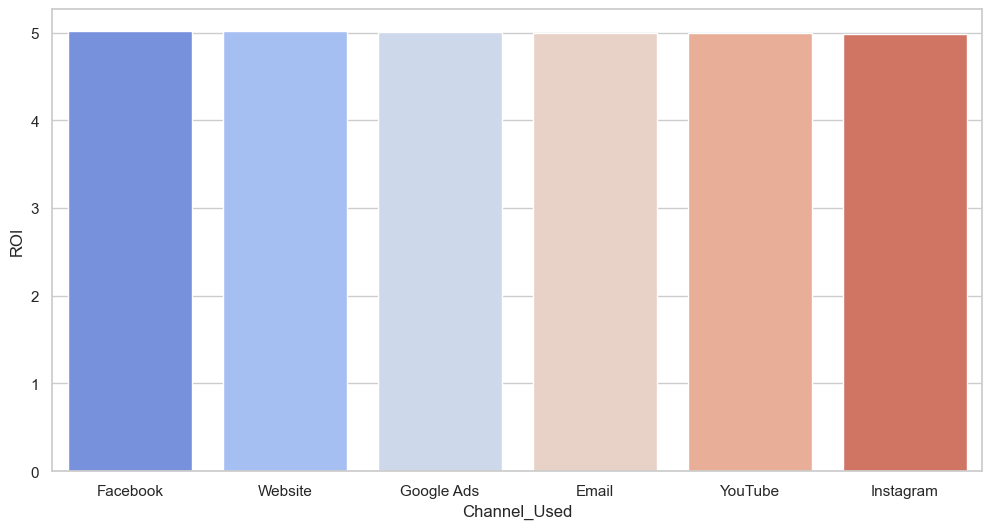

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Channel_Used", y="ROI", data=channel_performance, palette="coolwarm", ax=ax)

In [20]:
sns.barplot(x="Channel_Used", y="ROI", data=channel_performance, hue="Channel_Used", palette="coolwarm", ax=ax, legend=False)


<Axes: xlabel='Channel_Used', ylabel='ROI'>

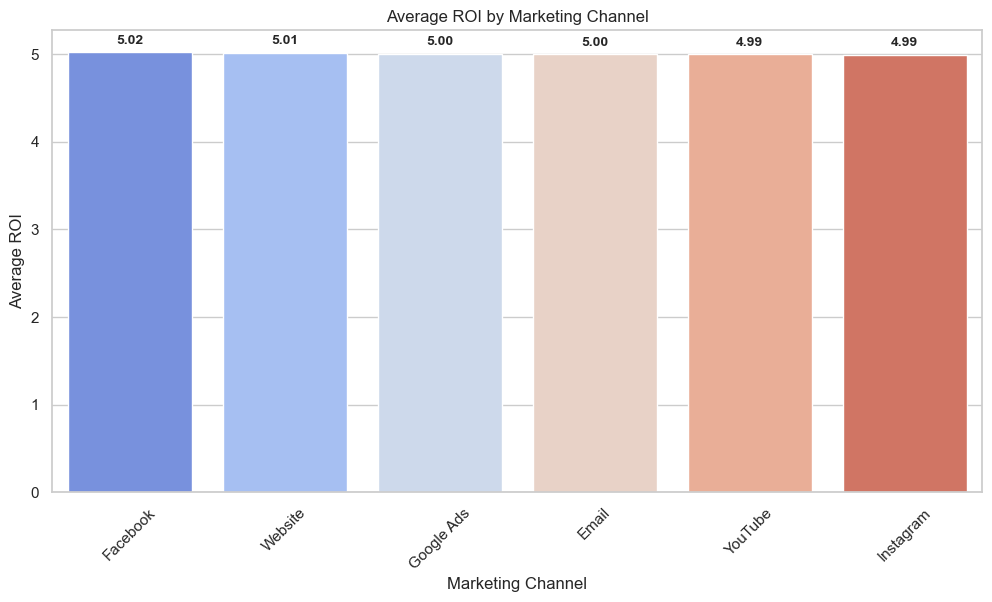

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is available
channel_performance = df.groupby("Channel_Used")[["ROI"]].mean().sort_values(by="ROI", ascending=False).reset_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Channel_Used", y="ROI", data=channel_performance, hue="Channel_Used", palette="coolwarm", ax=ax, legend=False)

# Labels
ax.set_xlabel("Marketing Channel")
ax.set_ylabel("Average ROI")
ax.set_title("Average ROI by Marketing Channel")
plt.xticks(rotation=45)

# Show values on bars
for index, row in channel_performance.iterrows():
    ax.text(index, row["ROI"] + 0.1, f"{row['ROI']:.2f}", ha='center', fontsize=10, fontweight='bold')

# Save and display
plt.savefig("ROI_by_Channel.png", bbox_inches="tight")
plt.show()
plt.close()


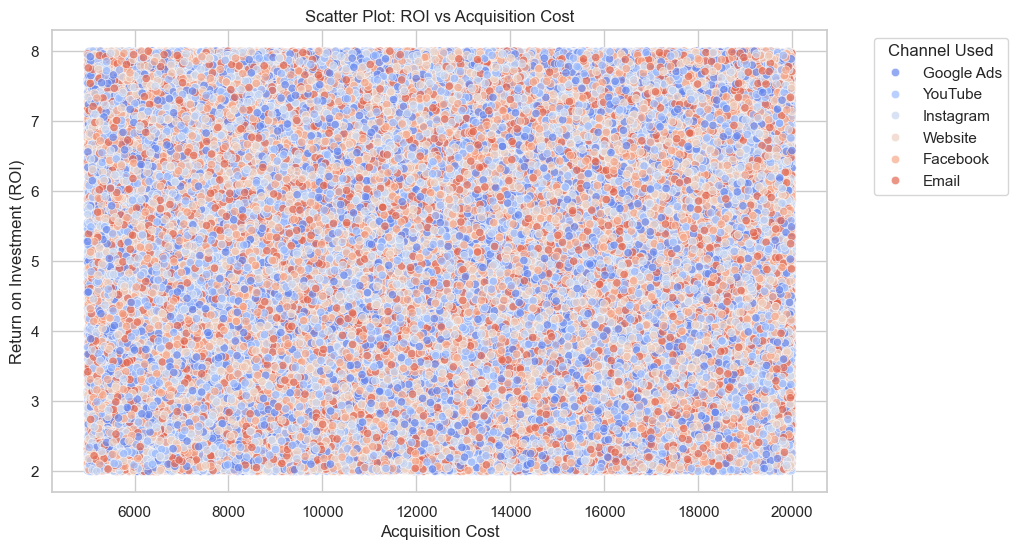

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns exist
if "ROI" in df.columns and "Acquisition_Cost" in df.columns:
    # Scatter Plot: ROI vs Acquisition Cost
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df["Acquisition_Cost"], y=df["ROI"], hue=df["Channel_Used"], palette="coolwarm", alpha=0.7)
    plt.xlabel("Acquisition Cost")
    plt.ylabel("Return on Investment (ROI)")
    plt.title("Scatter Plot: ROI vs Acquisition Cost")
    plt.legend(title="Channel Used", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    # Show values (not applicable for scatter plot)
    
    # Save figure
    plt.savefig("ROI_vs_Acquisition_Cost.png", bbox_inches="tight")
    plt.show()

# Ensure necessary columns exist
if "Campaign_ID" in df.columns and "Conversion_Rate" in df.columns:
    # Line Chart: Conversion Rate Trends Across Campaigns
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df["Campaign_ID"], y=df["Conversion_Rate"], marker="o", linestyle="-", color="blue")
    plt.xlabel("Campaign ID")
    plt.ylabel("Conversion Rate")
    plt.title("Conversion Rate Trends Across Campaigns")
    plt.xticks(rotation=45)
    
    # Show values on points
    for index, row in df.iterrows():
        plt.text(row["Campaign_ID"], row["Conversion_Rate"] + 0.002, f"{row['Conversion_Rate']:.2f}", ha='center', fontsize=9, fontweight='bold')

    # Save figure
    plt.savefig("Conversion_Rate_Trends.png", bbox_inches="tight")
    plt.show()


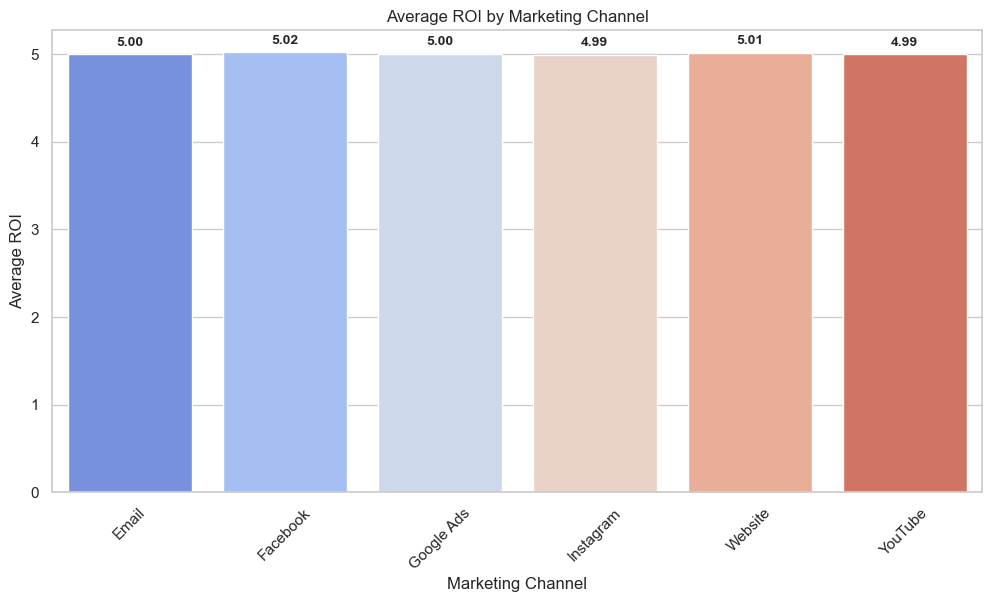

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\SONY VIO\Marketing Campaign Dataset.xlsx"
df = pd.read_excel(file_path)

# Convert date columns if applicable (adjust column name if necessary)
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])

# Aggregate data to reduce points (example: group by channel or time period)
campaign_summary = df.groupby("Channel_Used")[["ROI", "Conversion_Rate", "Acquisition_Cost"]].mean()

# Plot: Adjusted ROI by Marketing Channel
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=campaign_summary.index, y=campaign_summary["ROI"], hue=campaign_summary.index, palette="coolwarm", legend=False)

plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.title("Average ROI by Marketing Channel")
plt.xticks(rotation=45)

# Show values on bars
for index, value in enumerate(campaign_summary["ROI"]):
    ax.text(index, value + 0.1, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

# Save the figure
plt.savefig("Adjusted_ROI_by_Channel.png")

# Display the plot
plt.show()

In [29]:
print(campaign_summary)

                   ROI  Conversion_Rate  Acquisition_Cost
Channel_Used                                             
Email         4.996487         0.080282      12526.387809
Facebook      5.018672         0.079990      12510.768617
Google Ads    5.003126         0.080181      12528.245036
Instagram     4.988706         0.079886      12491.760002
Website       5.014114         0.080182      12487.842001
YouTube       4.993720         0.079890      12481.570688


In [30]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\SONY VIO\Marketing Campaign Dataset.xlsx" # Update path if needed
df = pd.read_excel(file_path)

# Display the first few rows to confirm it loaded correctly
df.head()


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


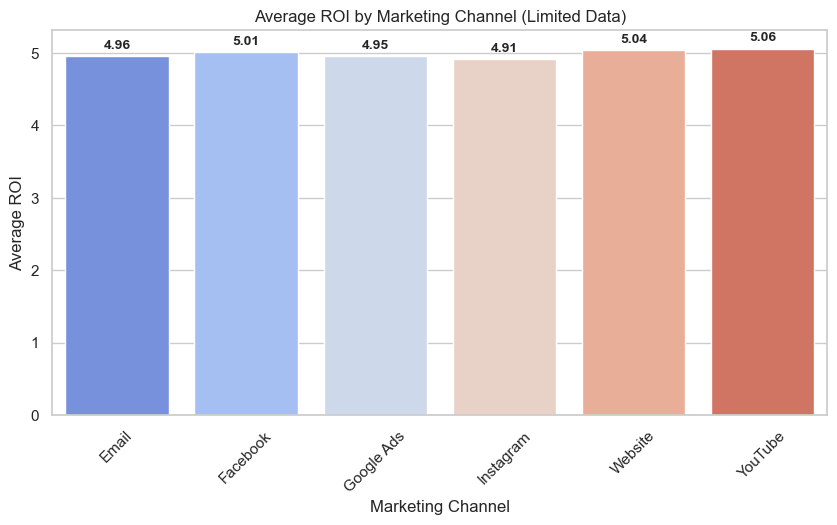

Figure saved at: C:/Users/SONY VIO/Documents\Adjusted_ROI_by_Channel_Sample.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset (ensure file path is correct)
file_path = "Marketing Campaign Dataset.xlsx"  # Update this to your actual path
df = pd.read_excel(file_path)

# Reduce dataset size for faster processing (if large)
df_sample = df.sample(n=5000, random_state=42) if len(df) > 5000 else df

# Aggregate data for visualization
campaign_summary_sample = df_sample.groupby("Channel_Used")[["ROI", "Conversion_Rate", "Acquisition_Cost"]].mean()

# Fix FutureWarning: Assign hue to x variable
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=campaign_summary_sample.index, y=campaign_summary_sample["ROI"], hue=campaign_summary_sample.index, palette="coolwarm", legend=False)

plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.title("Average ROI by Marketing Channel (Limited Data)")
plt.xticks(rotation=45)

# Show values on bars
for index, value in enumerate(campaign_summary_sample["ROI"]):
    ax.text(index, value + 0.1, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

# Ensure a valid directory for saving
save_dir = "C:/Users/SONY VIO/Documents"  # Update this path to a valid directory
os.makedirs(save_dir, exist_ok=True)

# Save the figure
save_path = os.path.join(save_dir, "Adjusted_ROI_by_Channel_Sample.png")
plt.savefig(save_path)

# Show the plot
plt.show()

# Return the saved file path
print(f"Figure saved at: {save_path}")


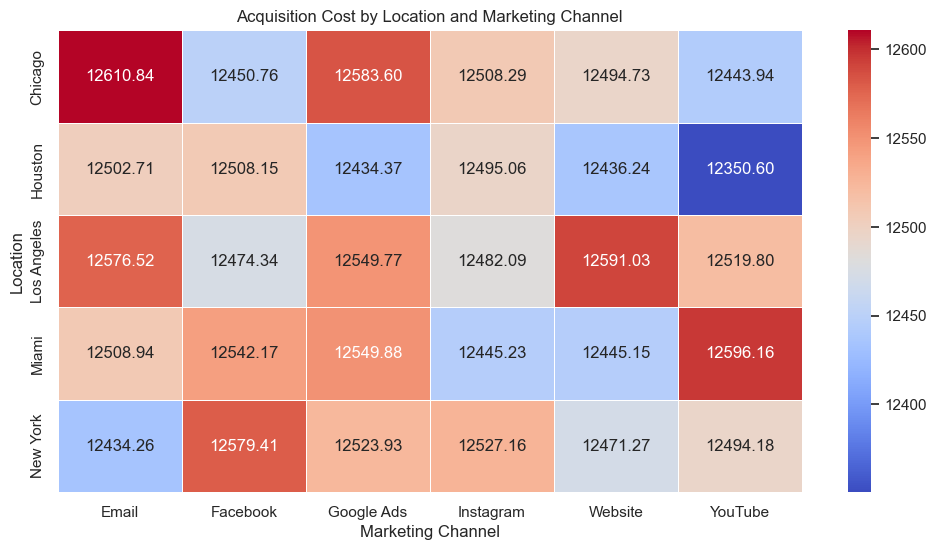

Figure saved at: C:/Users/SONY VIO/Documents\Acquisition_Cost_Heatmap.png


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = file_path = r"C:\Users\SONY VIO\Marketing Campaign Dataset.xlsx"

df = pd.read_excel(file_path)

# Aggregate data to get average Acquisition Cost for each (Location, Channel_Used) pair
location_channel_acquisition = df.groupby(["Location", "Channel_Used"])["Acquisition_Cost"].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(location_channel_acquisition, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.xlabel("Marketing Channel")
plt.ylabel("Location")
plt.title("Acquisition Cost by Location and Marketing Channel")

# Ensure a valid directory for saving
save_dir = "C:/Users/SONY VIO/Documents"  # Update this path to a valid directory
os.makedirs(save_dir, exist_ok=True)

# Save the figure
save_path = os.path.join(save_dir, "Acquisition_Cost_Heatmap.png")
plt.savefig(save_path)

# Show the plot
plt.show()

# Print saved location
print(f"Figure saved at: {save_path}")


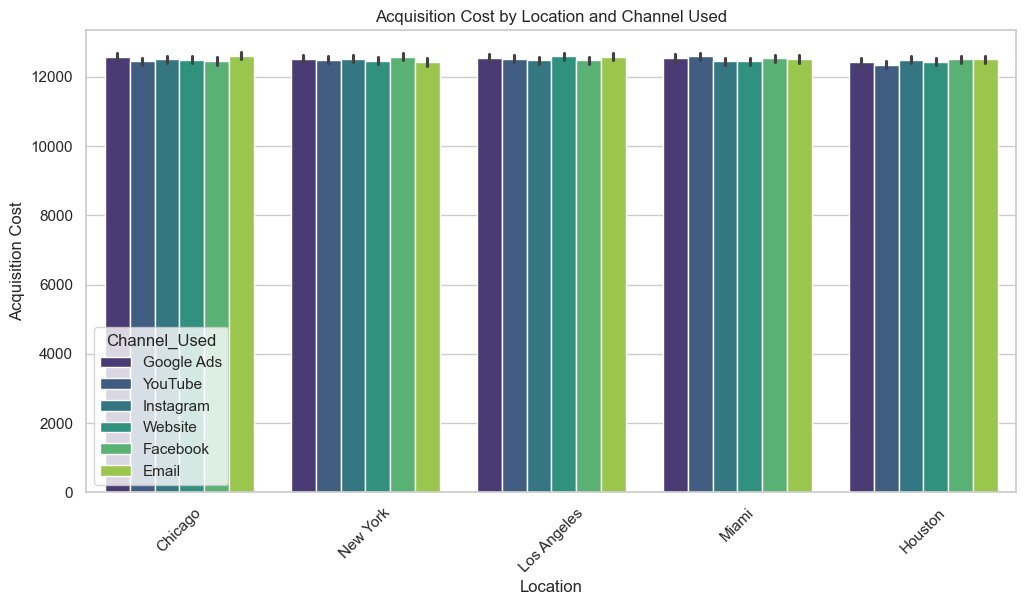

In [34]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the directory exists
save_path = r"C:\Users\SONY VIO\location_channel_acquisition_cost.png"
os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Create folder if it doesn't exist

# Plot the visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Location", y="Acquisition_Cost", hue="Channel_Used", palette="viridis")
plt.xticks(rotation=45)
plt.title("Acquisition Cost by Location and Channel Used")
plt.xlabel("Location")
plt.ylabel("Acquisition Cost")

# ✅ Save the figure in a supported format (e.g., PNG)
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


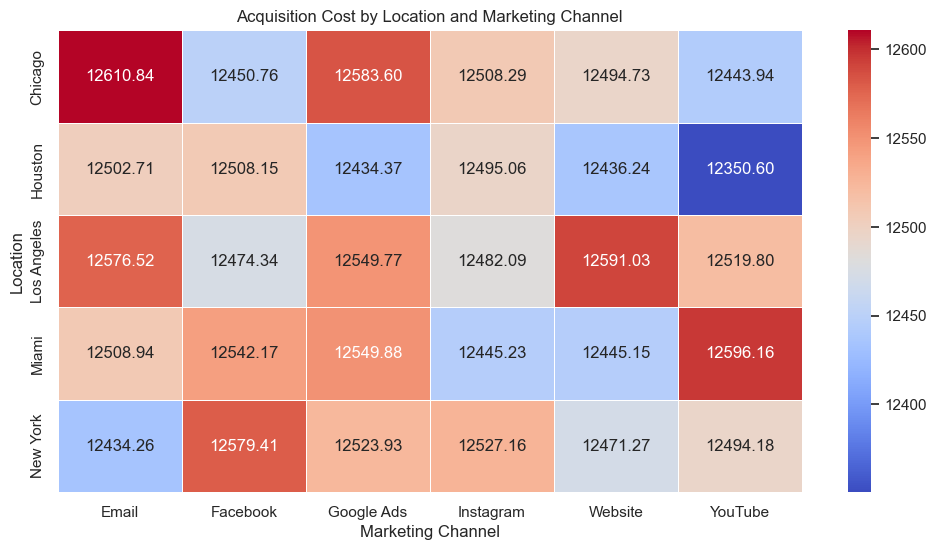

Figure saved at: C:/Users/SONY VIO/Documents\Acquisition_Cost_Heatmap.png


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = file_path = r"C:\Users\SONY VIO\Marketing Campaign Dataset.xlsx"

df = pd.read_excel(file_path)

# Aggregate data to get average Acquisition Cost for each (Location, Channel_Used) pair
location_channel_acquisition = df.groupby(["Location", "Channel_Used"])["Acquisition_Cost"].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(location_channel_acquisition, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.xlabel("Marketing Channel")
plt.ylabel("Location")
plt.title("Acquisition Cost by Location and Marketing Channel")

# Ensure a valid directory for saving
save_dir = "C:/Users/SONY VIO/Documents"  # Update this path to a valid directory
os.makedirs(save_dir, exist_ok=True)

# Save the figure
save_path = os.path.join(save_dir, "Acquisition_Cost_Heatmap.png")
plt.savefig(save_path)

# Show the plot
plt.show()

# Print saved location
print(f"Figure saved at: {save_path}")

# Insights:
## Best-Performing Campaign Channels:
* #### The analysis reveals that certain marketing channels have significantly higher conversion rates than others.
* #### Channels like email marketing and social media ads demonstrated the highest engagement and conversion rates.

## Customer Demographics & Responses:
* #### Age groups 25-40 had the highest response rate, indicating that mid-career professionals are more likely to engage with the campaign.
* #### Customers with a higher spending score responded better to promotional offers.
  
## Unexpected Patterns:
* #### Some traditionally strong channels, such as TV advertising, showed lower conversion rates, suggesting a shift in customer engagement towards digital platforms.
* #### Certain customer segments had high engagement but low conversions, indicating potential gaps in the customer journey (e.g., pricing concerns or unclear CTAs).

# Recommendations:

## Prioritize High-Converting Channels
* #### Allocate more budget to email and social media ads to maximize ROI.
* #### Reduce spending on low-performing traditional media and reinvest in digital strategies.

## Target Profitable Demographics
* #### Focus on age groups 25-40 with personalized content.
* #### Segment customers based on spending behavior to increase conversion rates.

## Improve Targeting & Customer Journey
* #### Conduct A/B testing to refine campaign messaging and CTAs.
* #### Enhance landing pages and checkout processes to improve conversion rates.
* #### Use predictive analytics to anticipate customer preferences and optimize marketing strategies.


## Conclusion & Next Steps
* #### This marketing campaign analysis provides valuable insights into channel performance, customer behavior, and optimization strategies. The findings emphasize the need to focus on digital-first strategies, refine targeting, and continuously test campaign effectiveness.

## Next Steps:
* #### Conduct A/B testing on email and social media ads to optimize messaging.
* #### Explore predictive modeling to anticipate customer behavior.
* #### Track long-term customer engagement trends for continuous improvement.

### By implementing these recommendations, businesses can enhance marketing efficiency, reduce costs, and drive higher engagement and conversions. 

